# EDA Analysis

## Introduction:
In this exploratory data analysis (EDA) project, we delve into the Netflix IMDb dataset to gain valuable insights into the distribution, trends, and relationships of various attributes. The dataset provides information about titles available on Netflix, including details such as type (Movie/TV Show), IMDb scores, number of votes, runtime, release year, age certifications, and more. The primary goal is to uncover meaningful patterns and understand the characteristics of the content available on the platform.

## Libraries used:
* Pandas: data manipulation and analysis library that provides data structures like Dictionaries and functions to work with structured data
* Seaborn: for statistical visualization
* Matplotlib.pyplot: for visualization, provides a larger collection of functions

In [ ]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset:
The dataset used for this project is taken from [Kaggle](https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores). 

In [22]:
filepath = "/kaggle/input/netflix-imdb-scores/Netflix TV Shows and Movies.csv"
df = pd.read_csv(filepath)

# To get an overview of the fields of our dataset
df.head(5)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


## 1. Which type (Movie/TV Show) is more prevalent on Netflix?

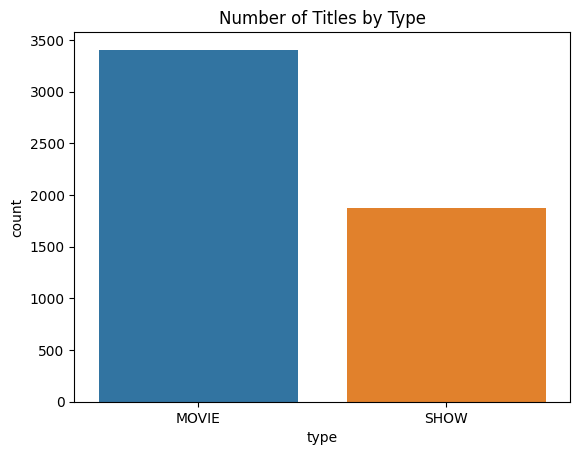

In [24]:
sns.countplot(data=df, x='type')
plt.title('Number of Titles by Type')
plt.show()

The countplot showcases that movies are more prevalent than shows on Netflix.There are around 3400 movies while number of TV shows is 1900. The plot clearly shows that the number of shows is almost half of the number of movies.

## Is there a correlation between IMDb scores and the number of votes?

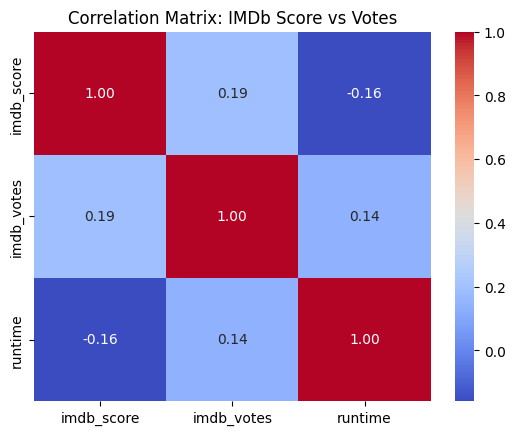

In [25]:
correlation_matrix = df[['imdb_score', 'imdb_votes', 'runtime']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: IMDb Score vs Votes')
plt.show()

The heatmap reveals correlations between IMDb scores, votes, and runtime. 

The correlation coefficient between IMDb score and votes is 0.19, which means that there is a weak positive correlation between the two variables. This means that titles with more votes tend to have higher IMDb scores, but the correlation is not very strong.



In [ ]:
sns.scatterplot(data=df, x='imdb_score', y='imdb_votes', hue='type')
plt.title('Correlation between IMDb Score and Votes')
plt.show()

In [ ]:
sns.scatterplot(data=df, x='imdb_score', y='runtime', hue='type')
plt.title('Correlation between IMDb Score and Runtime')
plt.show()

## What is the average IMDb score for movies and TV shows?

In [ ]:
df.describe()

In [ ]:
# Calculate the mean IMDb score for movies and TV shows
average_imdb_score = df.groupby('type')['imdb_score'].mean()

# Display the result
print(average_imdb_score)

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='imdb_score', data=df)

## Which titles have the highest IMDb scores?

In [ ]:
# Sort the DataFrame by IMDb scores in descending order
top_rated_titles = df.sort_values(by='imdb_score', ascending=False)
top_25 = top_rated_titles.head(25)


plt.figure(figsize=(10, 5))
sns.barplot(x='imdb_score', y='title', data=top_25, hue='type')
plt.title('Top-25 Titles Based on IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Title')
plt.show()

In [ ]:
# Filter the DataFrame to include only movies
movies_df = df[df['type'] == 'MOVIE']

top_rated_movies = movies_df.sort_values(by='imdb_score', ascending=False)
top_10 = top_rated_movies.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='imdb_score', y='title', data=top_10)
plt.title('Top-10 Movies Based on IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Movie')
plt.show()

## What is the percentage distribution of different age certifications?

age_certification
TV-MA                792
R                    548
TV-14                436
PG-13                424
PG                   238
TV-PG                172
G                    105
TV-Y7                104
TV-Y                  94
TV-G                  72
NC-17                 13
Name: count, dtype: int64


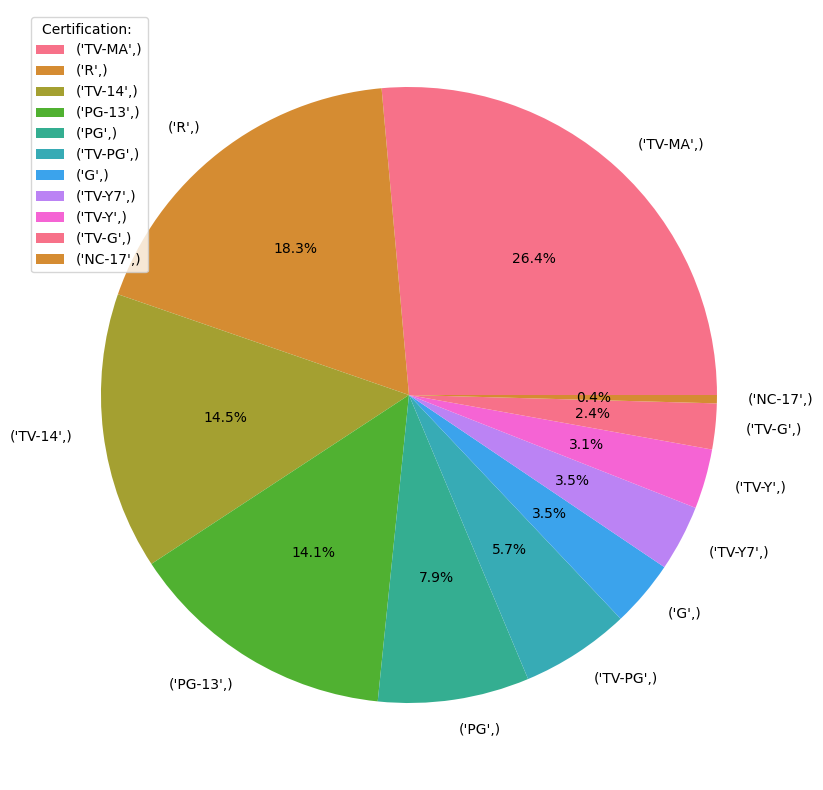

In [20]:
cert = df[['age_certification']]
cert_counts = cert.value_counts()
print(cert_counts)
plt.figure(figsize=(10, 10))
palette_color = sns.color_palette("husl", 9)
plt.pie(cert_counts, labels=cert_counts.index,autopct='%1.1f%%', startangle=0, colors=palette_color)
plt.legend(title = "Certification: ")
plt.show()

## How does the runtime vary for movies and TV shows? 

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='runtime', data=df)